使用tanh激活函式來訓練(0~1)範圍內進行"1的補數"的神經網路

# Include

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

2022-03-25 21:00:52.391867: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Model

In [3]:
input_1 = keras.Input(shape=(1, ))
output_1 = layers.Dense(1, activation='tanh')(input_1)
model = keras.Model(inputs=[input_1], outputs=[output_1])
model.summary()
model.compile(optimizer="adam", loss="mse")
# model.compile(optimizer=optimizers.Adam(0.001), loss=losses.MeanSquaredError())
print(model.get_weights())
# plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[-0.5360086]], dtype=float32), array([0.], dtype=float32)]


2022-03-25 21:00:53.670859: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-25 21:00:53.737198: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-25 21:00:53.737260: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu
2022-03-25 21:00:53.737273: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu
2022-03-25 21:00:53.737353: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 455.32.0
2022-03-25 21:00:53.737390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 455.32.0
2022-03-25 21:00:53.737400: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 455.32.0
2022-03-25 21:00:53.737795: I tensorflow/core/platform/cpu_feature_gua

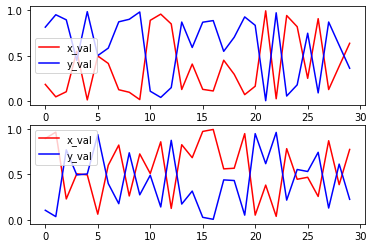

In [4]:
num = 1000
x_train = np.random.rand(num)
y_train = 1 - x_train
x_val = np.random.rand(num)
y_val = 1 - x_val
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

In [5]:
model_dir = 'models'
callbacks = list()
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 64
epochs = 10000

# Train

In [6]:
trainHistory = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

2022-03-25 21:00:54.092051: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-25 21:00:54.094145: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz


Epoch 1/10000
16/16 [==============================] - 0s 7ms/step - loss: 0.5925 - val_loss: 0.5490
Epoch 2/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.5611 - val_loss: 0.5183
Epoch 3/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.5306 - val_loss: 0.4885
Epoch 4/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.5010 - val_loss: 0.4597
Epoch 5/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.4725 - val_loss: 0.4320
Epoch 6/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.4452 - val_loss: 0.4055
Epoch 7/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.4190 - val_loss: 0.3803
Epoch 8/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.3942 - val_loss: 0.3564
Epoch 9/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.3705 - val_loss: 0.3338
Epoch 10/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.3482 - val_lo

[array([[-1.3814942]], dtype=float32), array([1.3090535], dtype=float32)]


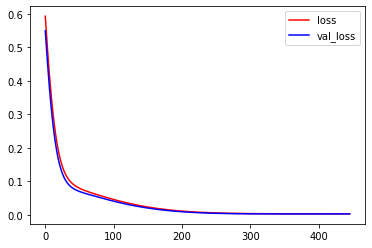

In [7]:
print(model.get_weights())
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

# Test

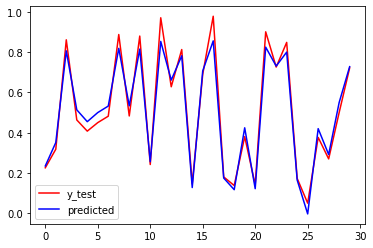

 0.775,  0.235, ads_diff = -0.009
 0.682,  0.351, ads_diff = -0.033
 0.138,  0.807, ads_diff =  0.055
 0.537,  0.514, ads_diff = -0.050
 0.592,  0.455, ads_diff = -0.047
 0.550,  0.500, ads_diff = -0.050
 0.518,  0.532, ads_diff = -0.050
 0.112,  0.819, ads_diff =  0.069
 0.517,  0.534, ads_diff = -0.050
 0.120,  0.816, ads_diff =  0.065
 0.758,  0.256, ads_diff = -0.014
 0.029,  0.854, ads_diff =  0.118
 0.372,  0.662, ads_diff = -0.033
 0.187,  0.782, ads_diff =  0.031
 0.855,  0.127, ads_diff =  0.018
 0.310,  0.707, ads_diff = -0.017
 0.021,  0.856, ads_diff =  0.122
 0.820,  0.175, ads_diff =  0.006
 0.863,  0.117, ads_diff =  0.021
 0.620,  0.424, ads_diff = -0.044
 0.859,  0.122, ads_diff =  0.019
 0.098,  0.825, ads_diff =  0.076
 0.274,  0.731, ads_diff = -0.005
 0.151,  0.801, ads_diff =  0.048
 0.827,  0.165, ads_diff =  0.008
 0.950, -0.004, ads_diff =  0.054
 0.623,  0.420, ads_diff = -0.044
 0.730,  0.291, ads_diff = -0.022
 0.500,  0.550, ads_diff = -0.050
 0.278,  0.728

In [9]:
num = 1000
x_test = np.random.rand(num)
y_test = 1 - x_test
predicted = model.predict(x_test)
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()
for i in range(100):
    print(f'{x_test[i]:6.3f}, {predicted[i, 0]:6.3f}, ads_diff = {1 - (predicted[i, 0] + x_test[i]):6.3f}')